# Evaluate predictions

In [1]:

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
import pickle
from sklearn.metrics import f1_score, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import auc
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split,TimeSeriesSplit
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.ensemble import RandomForestClassifier 

import joblib 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import matplotlib.pyplot as plt
from sklearn import preprocessing


In [2]:
with open('/Users/evaengel/comparison_NLP_classification_models/data/preprocessed_for_logistic_regression/preprocessed_data_en_all_levels.pkl', 'rb') as file:
    dataset_dict = pickle.load(file)
X_train, X_test, Y_train, Y_test = dataset_dict["X_train"], dataset_dict["X_test"], dataset_dict["Y_train"], dataset_dict["Y_test"]

FileNotFoundError: [Errno 2] No such file or directory: '/Users/evaengel/comparison_NLP_classification_models/data/preprocessed_for_logistic_regression/preprocessed_data_en_all_levels.pkl'

In [3]:
predictions = joblib.load('/Users/evaengel/comparison_NLP_classification_models/outputs/logistic_regression/predictions.joblib')

In [ ]:
f1_average = metrics.f1_score(Y_test, predictions, average= 'weighted')
print(f' F1-Score: {f1_average}')
f1_micro = metrics.f1_score(Y_test, predictions, average= 'micro')
print(f' F1-Score (micro): {f1_micro}')
f1_macro = metrics.f1_score(Y_test, predictions, average= 'macro')
print(f' F1-Score (macro): {f1_macro}')

lrap = metrics.label_ranking_average_precision_score(Y_test, predictions)
print(f'LRAP: {lrap}')

/Users/evaengel/comparison_NLP_classification_models/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


 F1-Score: 0.5005091423243683
 F1-Score (micro): 0.5331688785830578


/Users/evaengel/comparison_NLP_classification_models/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


 F1-Score (macro): 0.2532612090562935
LRAP: 0.41612567450785193


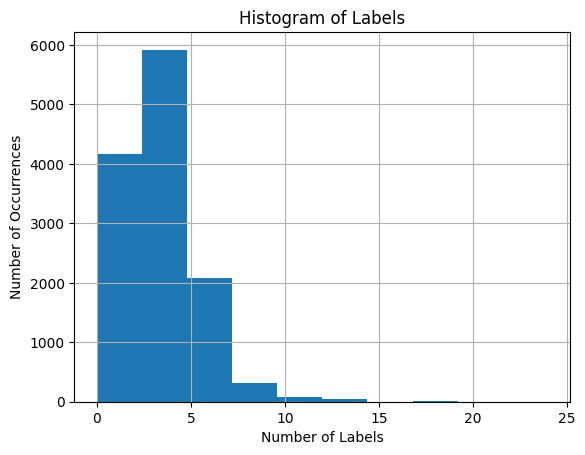

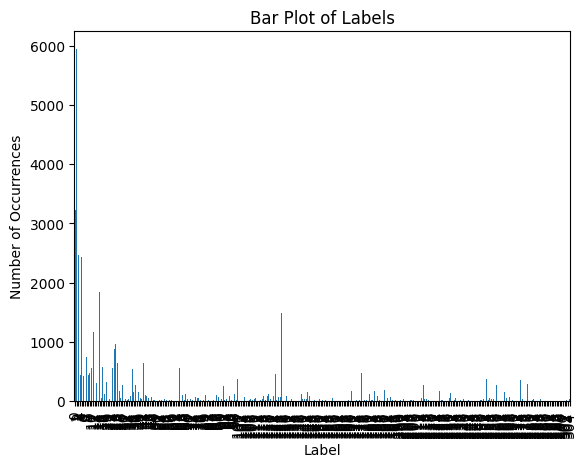

In [ ]:
# create a Pandas DataFrame to store the labels
labels_df = pd.DataFrame(predictions)

# plot the number of labels for one label
labels_count = labels_df.sum(axis=1)
labels_count.hist()
plt.xlabel('Number of Labels')
plt.ylabel('Number of Occurrences')
plt.title('Histogram of Labels')
plt.show()

# count the number of occurrences for each label
labels_sum = labels_df.sum()
labels_sum.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Number of Occurrences')
plt.title('Bar Plot of Labels')
plt.show()

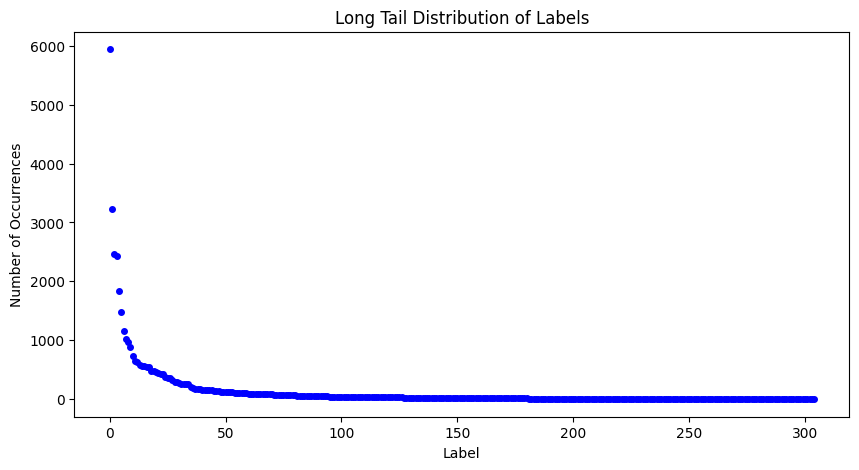

In [ ]:
# count the number of occurrences for each label
labels_sum = labels_df.sum()
labels_sum_sorted = labels_sum.sort_values(ascending=False)

# plot the long tail distribution of the labels
plt.figure(figsize=(10,5))
plt.plot(labels_sum_sorted.values, 'bo', markersize=4)
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Label')
plt.ylabel('Number of Occurrences')
plt.title('Long Tail Distribution of Labels')
plt.show()

In [ ]:
labels_sum_sorted

1      5940.0
0      3233.0
2      2469.0
4      2427.0
15     1833.0
        ...  
228       0.0
166       0.0
280       0.0
167       0.0
248       0.0
Length: 305, dtype: float64

In [ ]:
labels_sum

0      3233.0
1      5940.0
2      2469.0
3       445.0
4      2427.0
        ...  
300       2.0
301       0.0
302      13.0
303       4.0
304      36.0
Length: 305, dtype: float64

# Analysis of inverse transformed labels to get insight into hierarchical structure

In [13]:
le = joblib.load('/Users/evaengel/comparison_NLP_classification_models/data/preprocessed_for_logistic_regression/binarizer_all_levels.joblib') 

In [51]:
from typing import Tuple

def check_hiearchical_structure(labels: Tuple):
    """
    Check whether all the labels agree with the path structure of the tree-like classification structure.
    
    Parameters:
    - labels: Tuple of labels that follow the SCB clasification scheme.
    
    Returns:
    - True if all the labels agree with the path structure of the tree-like classification structure , False otherwise.
    """
    
    for label in labels:
        digits = len(str(label))
        if digits == 1:
            pass
        elif digits == 3:
            first_digit = int(str(label)[0])
            if not first_digit in labels:
                return False

        elif digits == 5:
            three_digits = int(str(label)[0:3])
            if not three_digits in labels:
                return False
    return True

In [52]:
labels = le.inverse_transform(predictions)
labels

[(2, 3),
 (2, 203, 20304),
 (2, 202, 20204),
 (5, 506, 50601),
 (3, 5, 302),
 (5,),
 (2, 203, 20304),
 (1, 102, 10208),
 (5,),
 (2, 205, 20502),
 (1, 3, 106, 302, 10602, 10609, 30101),
 (5,),
 (1, 105, 10502, 10508),
 (2,),
 (2,),
 (1, 3, 106, 301, 303),
 (3, 302),
 (2, 204, 205, 207, 20401, 20599),
 (2, 203, 20304),
 (2, 202),
 (2, 203),
 (2, 203, 20304),
 (2, 203, 20302, 20303),
 (5, 6, 509, 605, 50901),
 (1, 5, 105, 509, 10502, 50901),
 (2,),
 (2,),
 (3, 5, 303, 501, 30302),
 (),
 (3, 4, 302, 403, 40303),
 (5, 503),
 (2, 202, 203, 207, 20299, 20302, 20303),
 (6, 604),
 (5, 6),
 (1, 2, 102, 202, 10204, 10299, 20203, 20204, 20206),
 (1, 2, 103, 202, 210, 10302, 10304, 20299, 21001),
 (5, 504, 50401),
 (2, 202, 20203, 20207),
 (1, 103, 10304),
 (2,),
 (5, 509),
 (3, 301, 302, 30101, 30203, 30299),
 (1, 102, 10299),
 (2, 203, 20304),
 (6, 605),
 (2, 203, 20304),
 (5, 506, 50601),
 (2, 211, 21199),
 (5,),
 (2, 5),
 (5,),
 (2,),
 (1, 2, 106, 209),
 (3, 303, 403),
 (1, 2),
 (2,),
 (2, 202,

In [53]:
checks = list()
for item in le.inverse_transform(Y_test):
    checks.append(check_hiearchical_structure(item))
print(f'{round(sum(checks)/len(checks),4)*100}% of the labels match the hierarchical classification structure.')

90.16% of the labels match the hierarchical classification structure.


# Analysis logistic regression model

In [5]:
model = joblib.load('/Users/evaengel/comparison_NLP_classification_models/outputs/logistic_regression/best_model.joblib')

/Users/evaengel/comparison_NLP_classification_models/.venv/lib/python3.9/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/evaengel/comparison_NLP_classification_models/.venv/lib/python3.9/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator ClassifierChain from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [6]:
model.get_params()

{'base_estimator__C': 1.0,
 'base_estimator__class_weight': None,
 'base_estimator__dual': False,
 'base_estimator__fit_intercept': True,
 'base_estimator__intercept_scaling': 1,
 'base_estimator__l1_ratio': None,
 'base_estimator__max_iter': 1000,
 'base_estimator__multi_class': 'auto',
 'base_estimator__n_jobs': None,
 'base_estimator__penalty': 'l2',
 'base_estimator__random_state': 42,
 'base_estimator__solver': 'sag',
 'base_estimator__tol': 0.0001,
 'base_estimator__verbose': 0,
 'base_estimator__warm_start': False,
 'base_estimator': LogisticRegression(max_iter=1000, random_state=42, solver='sag'),
 'cv': None,
 'order': None,
 'random_state': None,
 'verbose': True}

In [12]:
model.decision_function(X_test)

KeyboardInterrupt: 

# Check correctness of splits:

In [8]:
from src.preprocessing.get_preprocessed_data import get_preprocessed_data
from sklearn import preprocessing
import numpy as np

In [2]:
model_type = 'logistic_regression'

X_train, X_test, Y_train, Y_test = get_preprocessed_data(model_type, overwrite_data=False)

preprocessed_data.pkl already exists at data/preprocessed/logistic_regression_en_all_levels_val.
Data already exists and will not be overwritten.


In [18]:
BERT_X_train

40911    Addressing the immunotoxic effect of environme...
30815    Epigenetics of the lung-brain axis in Multiple...
20947    Travelgrants Senzime SSBBS 2015\nPurpose and g...
36624    Mask Based Lithography for Fast, Large Scale P...
10987    Climate change, political instability, and sta...
                               ...                        
43015    Genomic of adaptation in selfing polyploid spe...
7769     CRISPRi for elucidating stress regulation in y...
16046    Energy-efficient Smart Mobility needs governan...
25391    Researchers´ Network in eGovernment\nPurpose a...
38856    The physiology and genetics of fruit formation...
Name: text, Length: 26877, dtype: object

In [3]:

BERT_X_train, BERT_X_test, BERT_X_val, BERT_Y_train, BERT_Y_test, BERT_Y_val = get_preprocessed_data('bert', overwrite_data= False)

preprocessed_data.pkl already exists at data/preprocessed/bert_en_all_levels_val.
Data already exists and will not be overwritten.


In [14]:
Y_test.squeeze()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]])

In [16]:
(Y_test == BERT_Y_test).all()

True